# <div style="text-align: center"> Using Python ADVANCED

## <div style="text-align: center">Introduction to Python (IV) - Advanced topics

### <span style="color:red"> *PLEASE ENTER THIS CELL AND WRITE YOUR NAME HERE:*_____________________________ </span>

![logo](https://www.kozminski.edu.pl/fileadmin/_processed_/csm_logotypy_plaskie__kozminski_university_0430be3c25.png)
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [123]:
# to navigate through folders and files
import os.path as op
import glob


# this module calculates time differences
from dateutil.relativedelta import relativedelta

# for operations on dates
import datetime


# for loading and normalizing json files
import json
from pandas import json_normalize


# to display progress and execution time, e.g. for loops
from tqdm.notebook import tqdm

We will often use these and other imports appearing in the notebook, and probably we will not always want to enter them all. Sometimes it's good to take a moment and keyboard in all these imports, but for the sake of our time and mental comfort we can create a `.py` file with all frequently used imports and continue to use it in our notebook. That's why the warm-up exercise is waiting for you:

### Exercise - Importing functions from external files
* Create the file `imports.txt` in the folder with this notebook. In addition, you can use, for example, the text editor [Atom](https://atom.io/).
* copy to the file `imports.txt` imports appearing in the first two cells of this notebook (but not`%matplotlib inline` - it is a "magical function" and works only in notebooks) and save `imports.py`
* replace the contents of the first cell of this notebook (the one with imports) with:
  ```Python
  from imports import *
  ```
  it means *import everything from a file / module called `imports`*
* restart your notebook (`kernel -> restart`), start from the beginning and check if the following cell is working:

---

# Databases - advanced level
File operations, dates, data wrangling

### Below we load 4 .json files downloaded from Wikidata:
https://www.wikidata.org/wiki/Wikidata:Main_Page <br>
https://query.wikidata.org/ <br>

These files contain various data about musicians from specific styles of music. However, all databases have the same number of columns (though different number of rows). They are taken from json files, so this is semi-structured data.

Let's define a path to load files so that you do not have to enter it constantly over and over again:

In [54]:
PTH = r'C:\Users\bartf\Downloads\DATA'

# the below code is creating a list of all file addresses - json files
FILES_JSON = glob.glob(op.join(PTH, '*.json')) 

In [55]:
PTH

'C:\\Users\\bartf\\Downloads\\DATA'

In [56]:
op.join(PTH, '*.json')

'C:\\Users\\bartf\\Downloads\\DATA\\*.json'

In [57]:
FILES_JSON

['C:\\Users\\bartf\\Downloads\\DATA\\death_death_metal.json',
 'C:\\Users\\bartf\\Downloads\\DATA\\death_hip_hop_music.json',
 'C:\\Users\\bartf\\Downloads\\DATA\\death_jazz.json',
 'C:\\Users\\bartf\\Downloads\\DATA\\death_pop_music.json']

In [58]:
len(FILES_JSON)

4

In [59]:
FILES_JSON[0]

'C:\\Users\\bartf\\Downloads\\DATA\\death_death_metal.json'

We can load the first file to review it

In [60]:
with open(FILES_JSON[0], encoding='utf-8', errors='ignore') as json_data:
         data = json.load(json_data, strict=False)

# create a new dataframe, and normalize it
df_json = pd.DataFrame.from_dict(json_normalize(data), orient='columns')

In [124]:
data

[{'instance_of': 'http://www.wikidata.org/entity/Q25660',
  'instance_ofLabel': 'Tomasz Wróblewski',
  'date_of_birth': '1980-06-02T00:00:00Z',
  'country_of_citizenship': 'http://www.wikidata.org/entity/Q36',
  'country_of_citizenshipLabel': 'Poland',
  'instrument': 'http://www.wikidata.org/entity/Q6607',
  'instrumentLabel': 'guitar',
  'occupation': 'http://www.wikidata.org/entity/Q177220',
  'occupationLabel': 'singer',
  'sex_or_gender': 'http://www.wikidata.org/entity/Q6581097',
  'sex_or_genderLabel': 'male',
  'place_of_birth': 'http://www.wikidata.org/entity/Q270',
  'place_of_birthLabel': 'Warsaw'},
 {'instance_of': 'http://www.wikidata.org/entity/Q25660',
  'instance_ofLabel': 'Tomasz Wróblewski',
  'date_of_birth': '1980-06-02T00:00:00Z',
  'country_of_citizenship': 'http://www.wikidata.org/entity/Q36',
  'country_of_citizenshipLabel': 'Poland',
  'instrument': 'http://www.wikidata.org/entity/Q46185',
  'instrumentLabel': 'bass guitar',
  'occupation': 'http://www.wikidata

In [62]:
# data list consists of dictionaries - not convenient for our operations
data[0]

{'instance_of': 'http://www.wikidata.org/entity/Q25660',
 'instance_ofLabel': 'Tomasz Wróblewski',
 'date_of_birth': '1980-06-02T00:00:00Z',
 'country_of_citizenship': 'http://www.wikidata.org/entity/Q36',
 'country_of_citizenshipLabel': 'Poland',
 'instrument': 'http://www.wikidata.org/entity/Q6607',
 'instrumentLabel': 'guitar',
 'occupation': 'http://www.wikidata.org/entity/Q177220',
 'occupationLabel': 'singer',
 'sex_or_gender': 'http://www.wikidata.org/entity/Q6581097',
 'sex_or_genderLabel': 'male',
 'place_of_birth': 'http://www.wikidata.org/entity/Q270',
 'place_of_birthLabel': 'Warsaw'}

What does the base look like? Please display the first 5 lines.

In [63]:
df_json.head()

,instance_of,instance_ofLabel,date_of_birth,country_of_citizenship,country_of_citizenshipLabel,instrument,instrumentLabel,occupation,occupationLabel,sex_or_gender,sex_or_genderLabel,place_of_birth,place_of_birthLabel,date_of_death,cause_of_death,cause_of_deathLabel,manner_of_death,manner_of_deathLabel,place_of_death,place_of_deathLabel
0,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_json[df_json.instance_ofLabel == 'Tomasz Wróblewski']

,instance_of,instance_ofLabel,date_of_birth,country_of_citizenship,country_of_citizenshipLabel,instrument,instrumentLabel,occupation,occupationLabel,sex_or_gender,sex_or_genderLabel,place_of_birth,place_of_birthLabel,date_of_death,cause_of_death,cause_of_deathLabel,manner_of_death,manner_of_deathLabel,place_of_death,place_of_deathLabel
0,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q753110,songwriter,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_json.loc[df_json['instance_ofLabel'] == 'Tomasz Wróblewski', :]

,instance_of,instance_ofLabel,date_of_birth,country_of_citizenship,country_of_citizenshipLabel,instrument,instrumentLabel,occupation,occupationLabel,sex_or_gender,sex_or_genderLabel,place_of_birth,place_of_birthLabel,date_of_death,cause_of_death,cause_of_deathLabel,manner_of_death,manner_of_deathLabel,place_of_death,place_of_deathLabel
0,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q753110,songwriter,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Please check the dimensions of the base, and then check how many 'unique' musicians are in the base.

</div>

In [125]:
df_json.shape

(371, 20)

In [67]:
df_json.instance_ofLabel.nunique()

100

In [68]:
len(df_json.instance_ofLabel.unique())

100

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Please check what data types we have in each column.

</div>

In [69]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   instance_of                  371 non-null    object
 1   instance_ofLabel             371 non-null    object
 2   date_of_birth                345 non-null    object
 3   country_of_citizenship       366 non-null    object
 4   country_of_citizenshipLabel  366 non-null    object
 5   instrument                   361 non-null    object
 6   instrumentLabel              361 non-null    object
 7   occupation                   371 non-null    object
 8   occupationLabel              371 non-null    object
 9   sex_or_gender                371 non-null    object
 10  sex_or_genderLabel           371 non-null    object
 11  place_of_birth               339 non-null    object
 12  place_of_birthLabel          339 non-null    object
 13  date_of_death                36 non

In [70]:
df_json.dtypes

instance_of                    object
instance_ofLabel               object
date_of_birth                  object
country_of_citizenship         object
country_of_citizenshipLabel    object
instrument                     object
instrumentLabel                object
occupation                     object
occupationLabel                object
sex_or_gender                  object
sex_or_genderLabel             object
place_of_birth                 object
place_of_birthLabel            object
date_of_death                  object
cause_of_death                 object
cause_of_deathLabel            object
manner_of_death                object
manner_of_deathLabel           object
place_of_death                 object
place_of_deathLabel            object
dtype: object

We define two variables, where one will contain only columns with dates, and the other all others.

In [71]:
col_dates = ['date_of_birth', 'date_of_death']

col_no_dates = ['cause_of_deathLabel', 'manner_of_deathLabel',
                'country_of_citizenshipLabel', 'place_of_birthLabel',
                'place_of_deathLabel', 'sex_or_genderLabel']

In [72]:
len(col_dates + col_no_dates)

8

Please think about how to merge the entire database, but in such a way that one row would be one person (it's a very difficult task!).

#### This can be done e.g. in the following way:

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Please create an empty DataFrame called `df` that would have as columns 'musician_name'+col_dates+col_no_dates, and the length of the df (i.e. the number of rows) would be equal to the number of unique musicians in the base.

</div>

In [73]:
print(type(col_dates), type('musician_name'))

<class 'list'> <class 'str'>


In [74]:
musician_columns = ['musician_name'] + col_dates + col_no_dates

musician_index = range(df_json.instance_ofLabel.nunique())

print(musician_columns)

print(musician_index)

df = pd.DataFrame(index=musician_index, columns=musician_columns)

['musician_name', 'date_of_birth', 'date_of_death', 'cause_of_deathLabel', 'manner_of_deathLabel', 'country_of_citizenshipLabel', 'place_of_birthLabel', 'place_of_deathLabel', 'sex_or_genderLabel']
range(0, 100)


In [75]:
df.head()

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.shape

(100, 9)

So above attribute means that we will have 100 unique musicians in the death metal music genre.

### Now, please fill in the first column `musician_name` with unique names of musicians.

**IMPORTANT**: We need unique musicians in each row, because in statistics/visualisations etc. each separate row should correspond to a separate person/object/event. Otherwise, you would visualise e.g. 18 Tomasz Wróblewskis from our database and 5 Alex Websters, instead of 1 instance of each musician! This would create a bias in your statistics/visualisations.

In [77]:
df.musician_name = df_json.instance_ofLabel.unique()

In [78]:
df.head()

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Tomasz Wróblewski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Patryk Dominik Sztyber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kristian Wåhlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Igor Pablo Cavalera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alex Webster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Sort the base by musician names.

</div>

In [79]:
df = df.sort_values(by='musician_name').reset_index(drop=True)

In [126]:
df.head()

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Alex Webster,1969-10-25T00:00:00Z,NaT,NaN,NaN,United States of America,Akron,NaN,male
1,Allen West,1967-10-17T00:00:00Z,NaT,NaN,NaN,United States of America,Brandon,NaN,male
2,Anders Hammer,1980-04-03T00:00:00Z,NaT,NaN,NaN,Sweden,NaN,NaN,male
3,Ares,1973-06-03T00:00:00Z,NaT,NaN,NaN,Norway,Bergen,NaN,male
4,Astennu,2000-01-01T00:00:00Z,NaT,NaN,NaN,Australia,Sydney,NaN,male


<div class="alert alert-block alert-success">
⚠️TASK 5 (VERY DIFFICULT)
<br>

Please fill in the dataframe `df` with data from `df_json`. This is difficult, since the dataframes have different dimensions. So you need to devise a way of filling smaller `df` with squeezed info from `df_json`.
<br><br>
HINT: you need to use a loop and go through `col_dates` and `col_no_dates`, and in each iteration assign certain values to `df` using `df.loc[:, column]`. 

</div>

In [81]:
df_json.shape

(371, 20)

In [82]:
df.shape

(100, 9)

In [83]:
df_json.columns

Index(['instance_of', 'instance_ofLabel', 'date_of_birth',
       'country_of_citizenship', 'country_of_citizenshipLabel', 'instrument',
       'instrumentLabel', 'occupation', 'occupationLabel', 'sex_or_gender',
       'sex_or_genderLabel', 'place_of_birth', 'place_of_birthLabel',
       'date_of_death', 'cause_of_death', 'cause_of_deathLabel',
       'manner_of_death', 'manner_of_deathLabel', 'place_of_death',
       'place_of_deathLabel'],
      dtype='object')

In [84]:
df.columns

Index(['musician_name', 'date_of_birth', 'date_of_death',
       'cause_of_deathLabel', 'manner_of_deathLabel',
       'country_of_citizenshipLabel', 'place_of_birthLabel',
       'place_of_deathLabel', 'sex_or_genderLabel'],
      dtype='object')

In [85]:
df_json[df_json.instance_ofLabel == 'Flo Mounier']

,instance_of,instance_ofLabel,date_of_birth,country_of_citizenship,country_of_citizenshipLabel,instrument,instrumentLabel,occupation,occupationLabel,sex_or_gender,sex_or_genderLabel,place_of_birth,place_of_birthLabel,date_of_death,cause_of_death,cause_of_deathLabel,manner_of_death,manner_of_deathLabel,place_of_death,place_of_deathLabel
111,http://www.wikidata.org/entity/Q1284676,Flo Mounier,1974-06-29T00:00:00Z,http://www.wikidata.org/entity/Q16,Canada,http://www.wikidata.org/entity/Q128309,drum kit,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q288,Tours,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,http://www.wikidata.org/entity/Q1284676,Flo Mounier,1974-06-29T00:00:00Z,http://www.wikidata.org/entity/Q142,France,http://www.wikidata.org/entity/Q128309,drum kit,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q288,Tours,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_json[df_json.instance_ofLabel == 'Flo Mounier'].country_of_citizenshipLabel.unique()

array(['Canada', 'France'], dtype=object)

In [87]:
df_json[df_json.instance_ofLabel == 'Tomasz Wróblewski'].country_of_citizenshipLabel.unique()[0]

'Poland'

In [88]:
musician_columns[1:]

['date_of_birth',
 'date_of_death',
 'cause_of_deathLabel',
 'manner_of_deathLabel',
 'country_of_citizenshipLabel',
 'place_of_birthLabel',
 'place_of_deathLabel',
 'sex_or_genderLabel']

In [89]:
name = ''

In [90]:
column

'sex_or_genderLabel'

In [91]:
df[df.musician_name == name]

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel


In [92]:
df.loc[df.musician_name == name, column]

Series([], Name: sex_or_genderLabel, dtype: object)

In [93]:
for name in tqdm(df.musician_name):
    for column in musician_columns[1:]:
        try:
            df.loc[df.musician_name == name, column] = df_json.loc[df_json.instance_ofLabel == name, column].unique()
        except:
            df.loc[df.musician_name == name, column] = str(df_json.loc[df_json.instance_ofLabel == name, column].unique())

In [94]:
name

'Will Rahmer'

In [95]:
column

'sex_or_genderLabel'

In [96]:
str(df_json.loc[df_json.instance_ofLabel == name, column].unique())

"['male']"

In [97]:
df.head(2)

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Alex Webster,1969-10-25T00:00:00Z,NaN,NaN,NaN,United States of America,Akron,NaN,male
1,Allen West,1967-10-17T00:00:00Z,NaN,NaN,NaN,United States of America,Brandon,NaN,male


In [98]:
df.country_of_citizenshipLabel.unique()

array(['United States of America', 'Sweden', 'Norway', 'Australia',
       'France', nan, 'Poland', "['Canada' 'France']", 'United Kingdom',
       'Austria', 'Brazil', 'Kingdom of the Netherlands',
       "['United States of America' 'United Kingdom']", 'Spain',
       "['England' 'United Kingdom']", 'Germany', 'Netherlands',
       'Finland'], dtype=object)

In [99]:
name

'Will Rahmer'

In [100]:
df

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Alex Webster,1969-10-25T00:00:00Z,NaN,NaN,NaN,United States of America,Akron,NaN,male
1,Allen West,1967-10-17T00:00:00Z,NaN,NaN,NaN,United States of America,Brandon,NaN,male
2,Anders Hammer,1980-04-03T00:00:00Z,NaN,NaN,NaN,Sweden,NaN,NaN,male
3,Ares,1973-06-03T00:00:00Z,NaN,NaN,NaN,Norway,Bergen,NaN,male
4,Astennu,2000-01-01T00:00:00Z,NaN,NaN,NaN,Australia,Sydney,NaN,male
...,...,...,...,...,...,...,...,...,...
95,Trevor Peres,1969-07-25T00:00:00Z,NaN,NaN,NaN,United States of America,NaN,NaN,male
96,Tuomas Lintulaakso,1980-01-01T00:00:00Z,2005-04-15T00:00:00Z,NaN,homicide,Finland,Oulu,NaN,male
97,Varg Vikernes,1973-02-11T00:00:00Z,NaN,NaN,NaN,Norway,Bergen,NaN,male
98,Wagner Lamounier,1970-04-30T00:00:00Z,NaN,NaN,NaN,Brazil,Belo Horizonte,NaN,male


In [101]:
# OR
# we are looping through the unique musicians and assigning the first row of each unique musician 
# from df_json to df

for idx, person in enumerate(df.musician_name):
    df.loc[idx, col_dates+col_no_dates] = df_json.query('instance_ofLabel == "{}"'.   # enter added for convinience
                                                        format(person)).reset_index().loc[0, col_dates+col_no_dates]

<div class="alert alert-block alert-warning">
📺 WATCH AT HOME
<br>

In the above code we have used the very important functions `enumerate` and `query`:

[Enumerate - Intermediate Python Programming](https://www.youtube.com/watch?v=bOGmYvtw-kk)
<br>
[Python Pandas | Querying Dataframe](https://www.youtube.com/watch?v=6WTFF-mKZX8)

</div>

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Please replace the objects in the columns with dates with the date format using the function `pd.to_datetime()`.
HINT: this function should take the parameter `format = '%Y-%m-%dT%H:%M:%SZ'` - this is exactly the format of our dates in this file.

</div>

In [301]:
# ERROR
# https://imgur.com/a/BLbbtdM
#
df.date_of_death = pd.to_datetime(arg = df.date_of_death ,format = '%Y-%m-%dT%H:%M:%SZ')
df.date_of_death

#df.date_of_birth = pd.to_datetime(arg = df.date_of_birth ,format = '%Y-%m-%dT%H:%M:%SZ')

0           NaT
1           NaT
2           NaT
3           NaT
4           NaT
        ...    
95          NaT
96   2005-04-15
97          NaT
98          NaT
99          NaT
Name: date_of_death, Length: 100, dtype: datetime64[ns]

<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

Add a group name (the music genre name) to the dataframe as the last column.<br>
HINT: you can use the json file name to do it.

</div>

In [300]:
df_json['music_genre']='Nan'
df_json

,instance_of,instance_ofLabel,date_of_birth,country_of_citizenship,country_of_citizenshipLabel,instrument,instrumentLabel,occupation,occupationLabel,sex_or_gender,...,place_of_birth,place_of_birthLabel,date_of_death,cause_of_death,cause_of_deathLabel,manner_of_death,manner_of_deathLabel,place_of_death,place_of_deathLabel,music_genre
0,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,...,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
1,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,...,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
2,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,...,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
3,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,...,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
4,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,...,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,http://www.wikidata.org/entity/Q7106159,Oscar Nilsson,1988-12-01T00:00:00Z,http://www.wikidata.org/entity/Q34,Sweden,http://www.wikidata.org/entity/Q128309,drum kit,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
367,http://www.wikidata.org/entity/Q7358390,Roger J. Beaujard,1971-12-20T00:00:00Z,http://www.wikidata.org/entity/Q30,United States of America,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,...,http://www.wikidata.org/entity/Q928168,Bronxville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
368,http://www.wikidata.org/entity/Q7358390,Roger J. Beaujard,1971-12-20T00:00:00Z,http://www.wikidata.org/entity/Q30,United States of America,http://www.wikidata.org/entity/Q128309,drum kit,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,...,http://www.wikidata.org/entity/Q928168,Bronxville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
369,http://www.wikidata.org/entity/Q7703265,Terrance Hobbs,1970-04-01T00:00:00Z,http://www.wikidata.org/entity/Q30,United States of America,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan


<div class="alert alert-block alert-success">
⚠️TASK 8 (DIFFICULT)
<br>

Please create a loop now, that would load each file from `FILES_JSON`, and then do the above operations on each of them in the loop. Then, add each file to a grand dataframe (merging all files together in one big dataframe)!

</div>

In [132]:
DF_final = pd.DataFrame()

for file in tqdm(FILES_JSON):
    # for Windows
    genre_name = file.split('\\')[-1].split('.')[0][6:]
    #print(genre_name)
#     # for Mac/Linux
#     genre_name = file.split('/')[-1].split('.')[0][6:]
#     print(file)
#     print(genre_name)
#     print('\n')
     
    # loading the data from JSON - df_json
      
       
    
    # create an empty dataframe df



    
    
    # fill out the df dataframe with values from the df_json dataframe




    
    
    # convert datetime columns to datetime format    

    # add a 'genre' column
    
    
    # append the DF_final with df dataframe
    
    
   
 

# Below, we are importing the final code written by me, for setting up the databases and merging them into one dataframe

In [151]:
from create_dataframe_music import create_music_df

In [160]:
DB_final = create_music_df(file_name=FILES_JSON)

There are 4 genres of music to process...




******************* Starting the file: death_metal...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: hip_hop_music...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: jazz...
--------======WARNING======-------- There are persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: pop_music...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...





In [299]:
DB_final.head

<bound method NDFrame.head of      instance_ofLabel instance_of date_of_birth date_of_death  \
0        Alex Webster         NaN    1969-10-25           NaT   
1          Allen West         NaN    1967-10-17           NaT   
2       Anders Hammer         NaN    1980-04-03           NaT   
3                Ares         NaN    1973-06-03           NaT   
4             Astennu         NaN    2000-01-01           NaT   
...               ...         ...           ...           ...   
3384            Özgün         NaN    1979-10-19           NaT   
3385    Øyvind Kolset         NaN    1971-03-19           NaT   
3386           Đỗ Bảo         NaN    1978-06-30           NaT   
3387     Şebnem Ferah         NaN    1972-04-12           NaT   
3388   Ưng Hoàng Phúc         NaN    1981-08-18           NaT   

     cause_of_deathLabel manner_of_deathLabel country_of_citizenshipLabel  \
0                    NaN                  NaN    United States of America   
1                    NaN           

---

<div class="alert alert-block alert-success">
⚠️TASK 9
<br>

Please check the minimum year of birth in each of the 4 music groups.

</div>

In [171]:

tmpList = {}
for i in range(len(DB_final)) : 
    if DB_final.loc[i, "group"] not in tmpList:
        tmpList[DB_final.loc[i, "group"]] = [DB_final.loc[i, "date_of_birth"]]
    else:
        tmpList[DB_final.loc[i, "group"]].append(DB_final.loc[i, "date_of_birth"])

for element, l in tmpList.items():
    
    print(element, min(l))

death_metal 1953-01-01 00:00:00
hip_hop_music 1950-01-01 00:00:00
jazz 1877-05-25 00:00:00
pop_music 1898-06-09 00:00:00


<div class="alert alert-block alert-success">
⚠️TASK 10
<br>

Please visualize the years of life and see if everything is good.

</div>

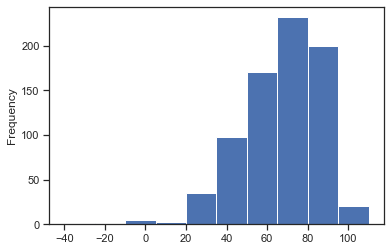

In [170]:
DB_final.years_of_life.plot.hist()
#there are some results under 0 

<div class="alert alert-block alert-success">
⚠️TASK 11
<br>

Please select from the database only those who were born in the earliest year of birth in the death metal group (i.e. when the first death metal musician was born). Assign the result dataframe to the variable `df_death`. Please also remove people who have a negative life duration.

</div>

In [296]:
df_death = DB_final[DB_final['group'] == 'death_metal']
df_death = df_death[df_death['date_of_birth'] < '1954-01-01 00:00:00'] 
df_death

,instance_ofLabel,instance_of,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel,quantity_instrumentLabel,quantity_occupationLabel,years_of_life,group
94,Tony Norman,NaN,1953-01-01,NaT,NaN,NaN,NaN,NaN,NaN,male,1.0,2,NaN,death_metal


<div class="alert alert-block alert-success">
⚠️TASK 12
<br>

Please check the number of deceased people in each group.

</div>

In [297]:
tmpList = {}
for i in range(len(DB_final)) :
    if pd.isnull(DB_final.loc[i, 'date_of_death']) == True : 
        continue
    if DB_final.loc[i, 'group'] not in tmpList:
        tmpList[DB_final.loc[i, 'group']] = [DB_final.loc[i, 'date_of_death']]
    else:
        tmpList[DB_final.loc[i, 'group']].append(DB_final.loc[i, 'date_of_death'])

for element, l in tmpList.items(): 
    print(element, len(l))

death_metal 12
hip_hop_music 33
jazz 588
pop_music 137


<div class="alert alert-block alert-success">
⚠️TASK 13
<br>

Please plot the life duration of people from particular groups, using both `sns.stripplot` (each dot will show the life duration of one person) and `sns.pointplot` (shows the average for a given group).
<br><br>
Stripplot should have the additional arguments `dodge=True, jitter=True`, while pointplot should have the argument `dodge=.532`.

</div>

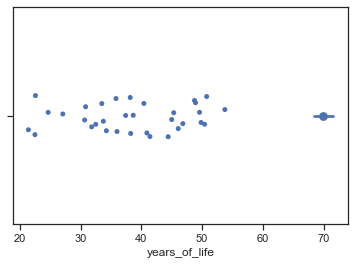

In [298]:
#import seaborn as sns
sns.stripplot
#df_jazz = []
df_jazz = DB_final[DB_final['group'] == 'jazz']
df_metal = DB_final[DB_final['group'] == 'death_metal']
df_pop = DB_final[DB_final['group'] == 'pop_music']
df_hipHop = DB_final[DB_final['group'] == 'hip_hop_music']
sns.pointplot(df_jazz.years_of_life, dodge=.532)
sns.stripplot(df_hipHop.years_of_life, dodge=True, jitter=True)
#sns.stripplot(DB_final.years_of_life)